In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
%matplotlib inline
sns.set_style('darkgrid')

In [9]:
gd = pd.read_excel('gun_data.xlsx', engine="openpyxl")

In [36]:
gd.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [22]:
#gd.shape

In [28]:
#print(gd.duplicated().sum())

0


In [37]:
gd.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [25]:
#gd.describe()

In [26]:
#gd.info()

In [27]:
#gun.isnull().sum()

In [20]:
#gd.nunique() or unique()

In [34]:
#gd.groupby(['state'], as_index=False)['handgun'].mean()

<AxesSubplot:>

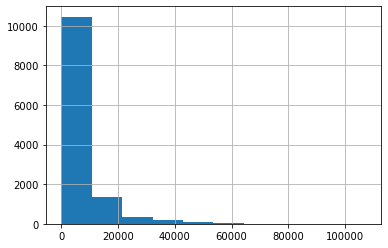

In [35]:
gd.handgun.hist()

graphic
gd.column.hist()
.plot(x="displ", y="cmb_mpg", kind="scatter");

count columns .value_counts()

______________________________
alt_08 = alpha08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

alt_18 = alpha18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");


veh_18 = gd.groupby('month').mean()
veh_18


inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

'private_sale_handgun','private_sale_long gun', 'private_sale_other'



In [49]:
#veh_18 = gd.groupby(['private_sale_handgun','private_sale_long_gun', 'private_sale_other']).month.sum()
 
#veh_18

gd1 = gd.query('month in ["private_sale_handgun"]').month.sum()
gd2 = gd.query('month in ["private_sale_long_gun"]').month.sum()
gd3 = gd.query('month in ["private_sale_other"]').month.sum()

plt.bar(["private_sale_handgun", "private_sale_long_gun","private_sale_other"], [gd1, gd2, gd3])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

<AxesSubplot:>

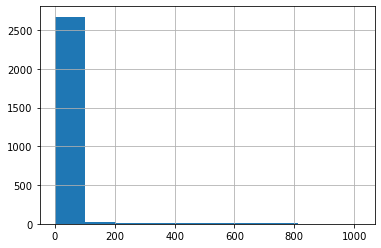

In [58]:
gd.private_sale_handgun.hist()

<AxesSubplot:>

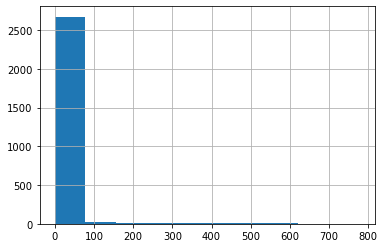

In [59]:
gd.private_sale_long_gun.hist()

<AxesSubplot:>

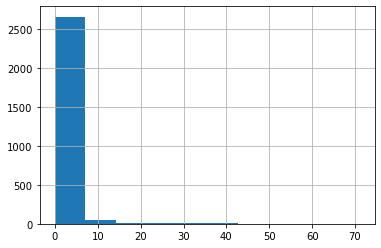

In [60]:
gd.private_sale_other.hist()